<a href="https://colab.research.google.com/github/ErialdoDFreitas/neural-networks-implementations/blob/main/SIMPLE_PERCEPTRON/Atividade_Perceptron_Salmao_e_Robalo_AP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Disciplina**: Aprendizagem Profunda - PPGCC IFCE
**Professor**: Saulo Freitas \
**Aluno**: Francisco Erialdo \

#### **Probrema**: Classificação de peixes Robalo ou Salmão (Pattern Classification 3nd ed. por Richard O. Duda, Peter E. Hart.)


## Questões teóricas:


**1. Defina o que é um Perceptron e elenque as diferenças de um neurônio biológico.** \
  R: É um modelo que de início, basicamente, é um modelo matemático baseado no neurônio biológico, onde é modelo que realiza combinações lineares dos inputs com pesos, onde é aplicada uma função de ativação para gerar a saída final. É possível montar redes de perceptron, para utilização em problemas mais complexos, sendo exemplo dessa rede, a famosa MLP (MultiLayer Perceptron), que basicamente é uma rede composta por vários Perceptrons (ou neurônios) empilhados em camadas ocultas, onde o treinamento é feito usando principalmente a técnica do Backpropagation, sendo capaz de resolver problemas não lineares.

**2. Qual o papel da taxa de aprendizagem no processo de treinamento de um Perceptron.** \
  R: A taxa de aprendizado desempenha um papel importante no processo de treinamento, pois é crucial para o ajuste dos pesos durante o treinamento, interferindo diretamente na convergência (ou "aprendizado) do treinamento da rede. Ela é essencial para garantir um aprendizado eficiente e estável.

**3. Por que e quando precisamos ajustar os pesos de um Perceptron?** \
  R: Porque é com esse ajuste que a rede vai "aprender", fazendo as operações ao decorrer das épocas de treinamento. Basicamente, os pesos são ajustados sempre que a saída prevista é diferente da saída desejada (quando ocorre um erro de classificação). Esse ajuste é preciso pois é assim que o modelo vai aprender a classificar as classes corretamentes.

## Prática
### - Implementações em python usando apenas as libs padrões da própria linguagem

#### Importação e Carregamento do Dataset

In [ ]:
import csv
import urllib.request as ul_request
import random
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# url bruta
dt_url = "https://raw.githubusercontent.com/sauloafoliveira/ppgcc-deep-learning/refs/heads/main/atividades/salmon_seabass.csv"

# Baixando o conteúdo do csv
response = ul_request.urlopen(dt_url)
lines = [l.decode('utf-8') for l in response.readlines()]

# Lê o CSV
reader = csv.reader(lines)

# Converte para uma lista de listas (ou uma lista de dicionários)
dataset = list(reader)

for linha in dataset[:5]:
  print(linha)

['index', 'lightness', 'width', 'species']
['0', '2.834754098360656', '21.087142857142855', '0']
['1', '3.329180327868852', '18.877142857142857', '0']
['2', '3.6904918032786886', '19.824285714285715', '0']
['3', '4.812459016393442', '17.759999999999998', '0']


#### Separando o dataset entre o conjunto dos Atributos (Características) e das variáveis alvo (rótulos de cada classe)

In [ ]:
X = [[float(linha[1]), float(linha[2])] for linha in dataset[1:]] # definindo X, ignorando o cabeçalho
y = [int(linha[3]) for linha in dataset[1:]]

In [ ]:
# Embaralhando os dados
all_data = list(zip(X, y))
random.seed(42)
random.shuffle(all_data)
X, y = zip(*all_data)

#### Definindo e instânciando o Modelo Perceptron

In [ ]:
# Perceptron
class Perceptron:
    def __init__(self, n_features, lr=0.01, epochs=100):
        self.W = [0.0] * n_features
        self.b = 0.0
        self.lr = lr
        self.epochs = epochs

    def predict(self, x_sample):
        z = sum(wi * xi for wi, xi in zip(self.W, x_sample)) + self.b
        return 1 if z >= 0 else 0

    def fit(self, X, y):
        for _ in range(self.epochs):
            for xi, yi in zip(X, y):
              y_pred = self.predict(xi)
              erro = yi - y_pred
              self.W = [wi + self.lr * erro * xi_j for wi, xi_j in zip(self.W, xi)]
              self.b += self.lr * erro

In [ ]:
# Treinando
model = Perceptron(n_features=2, lr=0.01, epochs=50)
model.fit(X, y)

#### Fazendo previsões com o modelo treinado, e mostrando os resultados da avaliação do modelo treinado

In [ ]:
# Previsões
y_pred = [model.predict(xi) for xi in X]

In [ ]:
# Matriz de confusão
tp = sum(1 for yp, yt in zip(y_pred, y) if yp == yt == 1)
tn = sum(1 for yp, yt in zip(y_pred, y) if yp == yt == 0)
fp = sum(1 for yp, yt in zip(y_pred, y) if yp == 1 and yt == 0)
fn = sum(1 for yp, yt in zip(y_pred, y) if yp == 0 and yt == 1)

print("Matriz de Confusão")
print(f"TP: {tp} | FP: {fp}")
print(f"FN: {fn} | TN: {tn}")

Matriz de Confusão
TP: 28 | FP: 1
FN: 29 | TN: 73


In [ ]:
# Métricas
acc = (tp + tn) / len(y)
prec = tp / (tp + fp) if (tp + fp) > 0 else 0
rec = tp / (tp + fn) if (tp + fn) > 0 else 0

print(f"\nAcurácia: {acc:.4f}")
print(f"Precisão: {prec:.4f}")
print(f"Reccall: {rec:.4f}")


Acurácia: 0.7710
Precisão: 0.9655
Reccall: 0.4912


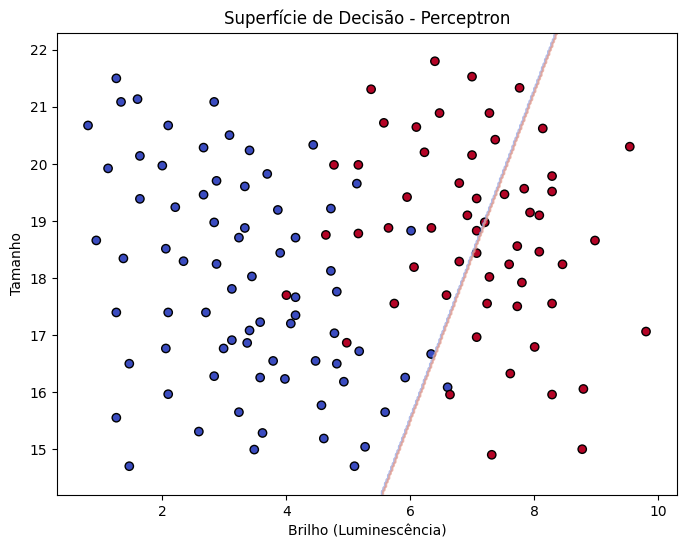

In [ ]:
# Superfície de Decisão
X_array = np.array(X)
x_min, x_max = X_array[:, 0].min() - 0.5, X_array[:, 0].max() + 0.5
y_min, y_max = X_array[:, 1].min() - 0.5, X_array[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                      np.linspace(y_min, y_max, 400))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([model.predict(p) for p in grid]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contour(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_array[:, 0], X_array[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel("Brilho (Luminescência)")
plt.ylabel("Tamanho")
plt.title("Superfície de Decisão - Perceptron")
plt.show()